In [1]:
from wordcloud import WordCloud
from matplotlib import rc
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# rc('font', family='nanum')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
data = pd.read_csv("final-project-level3-recsys-05/RecBole/dataset/final/cut_user_item.csv", lineterminator='\n')
data.head(2)

,item_id,user_id,time,star_avg,star_durability,star_design,star_cost,star_delivery,review,option,year,month,day
0,321021,367873,2020.08.28,5.00,5.0,5.0,5.0,5.0,첫 마디~~ 너무 예뻐요 깜직한 디자인에 거름망도 아주 정교하게 촘촘해서 차 마실...,단품,2020,8,28
1,321021,13531239,2021.08.23,4.25,5.0,5.0,3.0,4.0,아담하고 찾던 사이즈라 좋아요~ 생각보다 튼튼해 보입니다,단품,2021,8,23


In [5]:
user_list = [367873, 13531239, 2303213]
data.loc[data['user_id'].isin(user_list)]

,item_id,user_id,time,star_avg,star_durability,star_design,star_cost,star_delivery,review,option,year,month,day
0,321021,367873,2020.08.28,5.00,5.0,5.0,5.0,5.0,첫 마디~~ 너무 예뻐요 깜직한 디자인에 거름망도 아주 정교하게 촘촘해서 차 마실...,단품,2020,8,28
1,321021,13531239,2021.08.23,4.25,5.0,5.0,3.0,4.0,아담하고 찾던 사이즈라 좋아요~ 생각보다 튼튼해 보입니다,단품,2021,8,23
380425,752809,367873,2021.07.11,5.00,5.0,5.0,5.0,5.0,왕타 칫솔 한번 쓰면 다른 칫솔 못써요 ㅎㅎ,왕타 스톤 통칫솔 10P,2021,7,11
698820,1020795,367873,2021.07.11,5.00,5.0,5.0,5.0,5.0,밝은 데 눈부시지는 않고 너무 이쁘고 밤에 자기전에 켜놓기 좋아요,화이트 17cm 404.554.42,2021,7,11
929187,55496,367873,2021.03.10,5.00,5.0,5.0,5.0,5.0,진짜 대만족 깔끔하고 물 잘 빠지고 활용도가 ㄷ좋아요 😘,모먼트 식기건조대,2021,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12957798,59978,367873,2020.06.15,3.75,4.0,3.0,4.0,4.0,보기에 깔끔하고 예뻐서 구입했는데 그닥쓰기가 편치앟네요,종류: 스탠드 키친타올 걸이 / 색상: 그레이,2020,6,15
13011156,167769,367873,2019.07.20,5.00,5.0,5.0,5.0,5.0,이불이 부드럽고 좋습니다. 자꾸 빨면숨이 죽는데 그건 그것대로 몸에 감기는 느낌이 ...,뽀송뽀송 구름 베개솜(50X70),2019,7,20
13011165,167769,367873,2019.06.25,4.00,3.0,4.0,5.0,4.0,색상도 좋고 보드랍고 적당한 두께감 줗아요,순면베개커버50*70,2019,6,25
13011219,167769,367873,2019.02.17,4.50,5.0,5.0,4.0,4.0,보드랍고 깨끗하니 적당한 두께감이라 덮고자기 좋아요,순면베개커버50*70,2019,2,17


In [4]:
split = []
for avg in data['star_avg']:
    if avg <= 1: add = 1
    elif 1 < avg <= 2: add = 2
    elif 2 < avg <= 3: add = 3
    elif 3 < avg <= 4: add = 4
    else: add = 5
    split.append(add)
data['split'] = split

In [5]:
grouped = data.groupby(by=['item_id','split'])
for _, df in grouped:
    text = '\n'.join(df['review'].tolist())
    okt = Okt()
    nouns = okt.nouns(text)
    c = Counter(nouns)
    break

In [7]:
words = [n for n in nouns if len(n) > 1]
c = Counter(nouns)

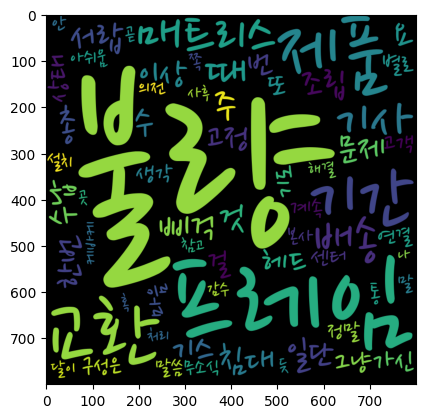

In [8]:
wc = WordCloud(font_path='/usr/share/fonts/nanum/NanumPen.ttf', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)